In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
sb.set()

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## UNIVARIATE PLOTS

Text(0.5, 0.98, 'Distribution of Quality')

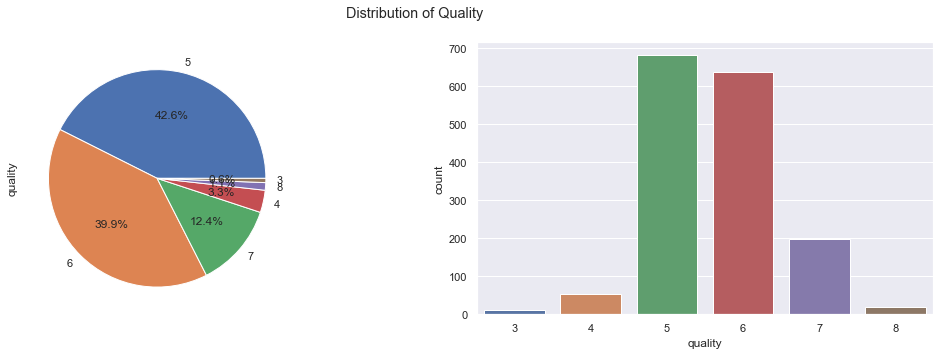

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
df['quality'].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[0])
sb.countplot(ax=axes[1], x=df['quality'], data=df)
fig.suptitle('Distribution of Quality')

In [6]:
def univariate_plots(df, variable):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sb.histplot(df[variable], bins=30, color='r')
    plt.title('Histogram of ' +variable)
    
    plt.subplot(1, 2, 2)
    sb.boxplot(y=df[variable])
    plt.title('Boxplot of ' +variable)
    
    plt.show()

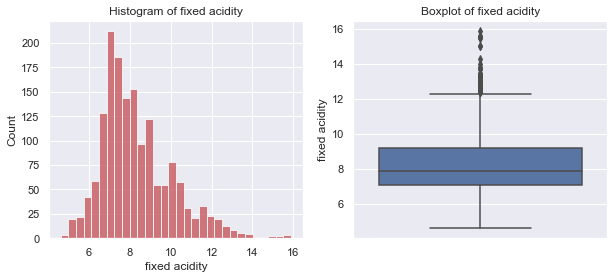

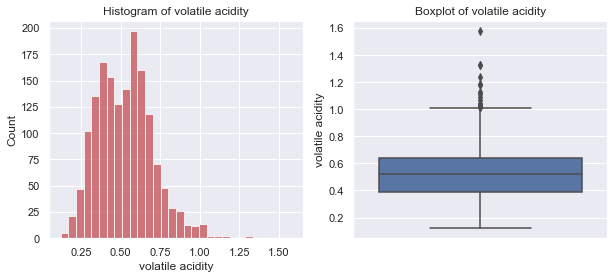

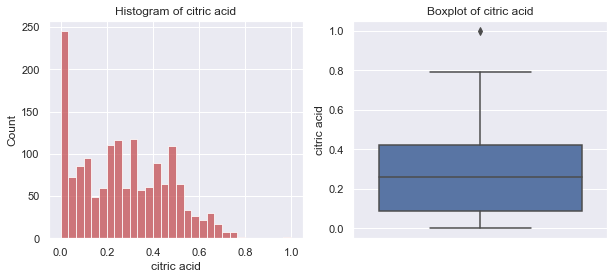

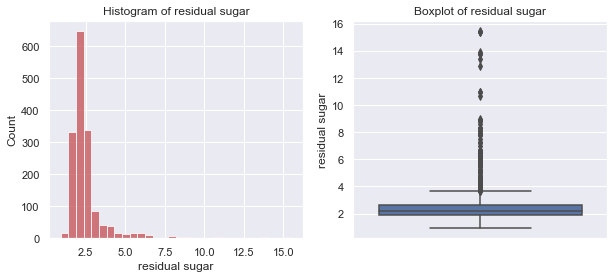

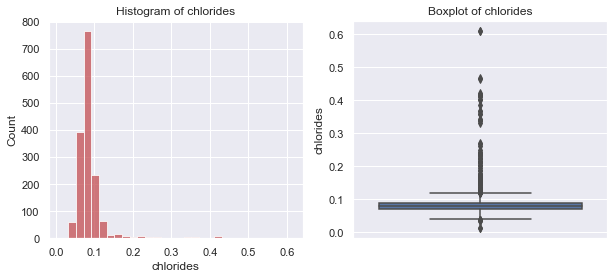

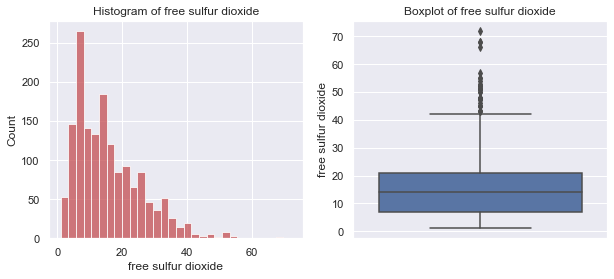

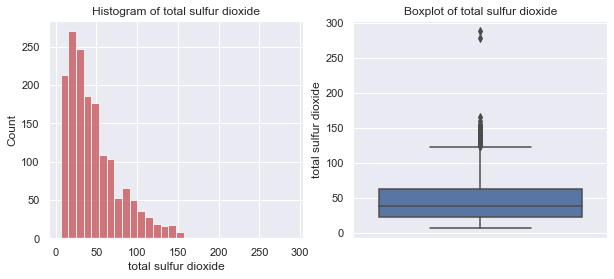

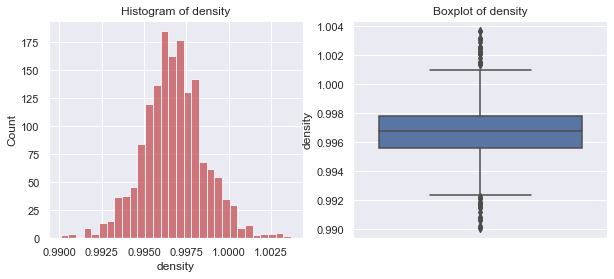

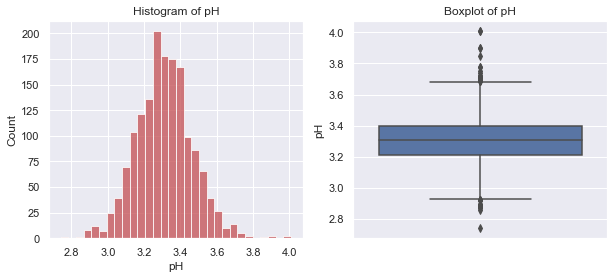

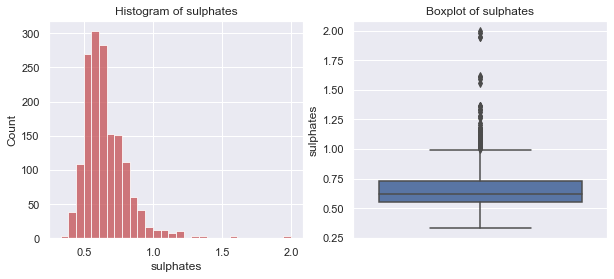

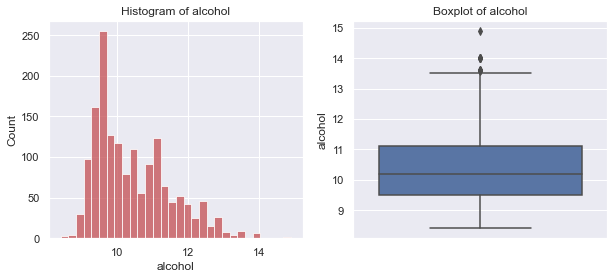

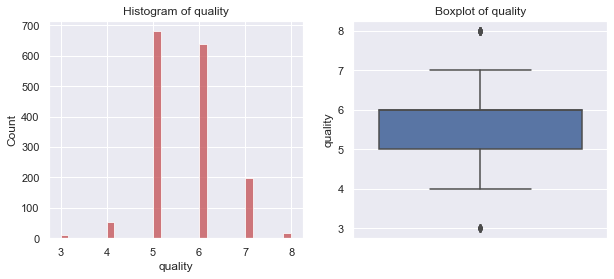

In [7]:
for variable in df:
    univariate_plots(df,variable)

## BIVARIATE PLOTS

In [50]:
def bivariate_plots(df, variable, a):
    plt.figure(figsize=(17, 4))

    plt.subplot(1, 4, 1)
    sb.barplot(x = a, y = variable, data = df)   
    plt.title('Barplot of ' +variable + ' and quality')
    
    plt.subplot(1, 4, 2)
    sb.boxplot(x = a, y = variable, data = df)   
    plt.title('Boxplot of ' +variable + ' and quality')
    
    plt.subplot(1, 4, 3)
    plt.scatter(df[variable],df[a])
    plt.title('Scatterplot of ' +variable + ' and quality')
    
    plt.subplot(1, 4, 4)
    sb.violinplot(x = a, y = variable, data = df)
    plt.title('Violinplot of ' +variable + ' and quality')
    
    plt.show()

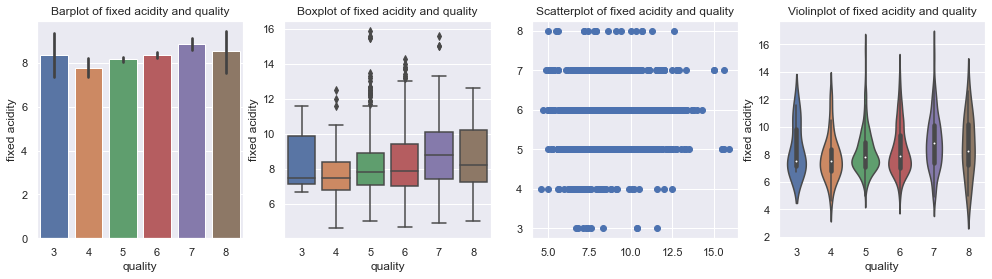

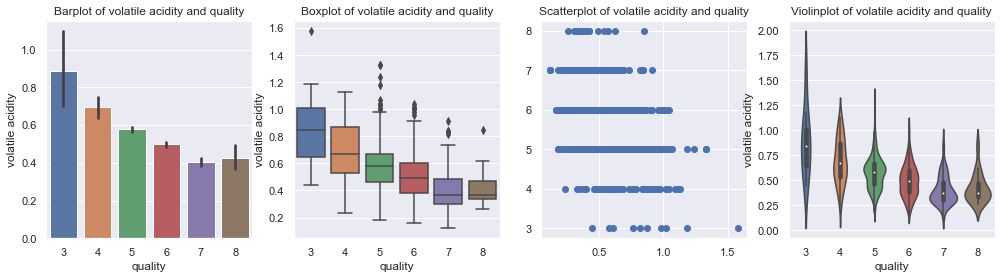

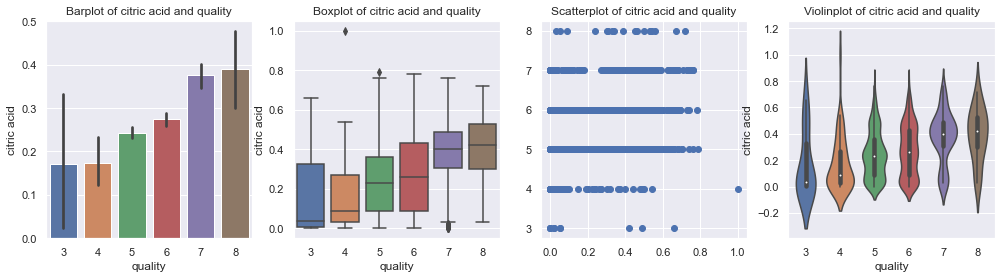

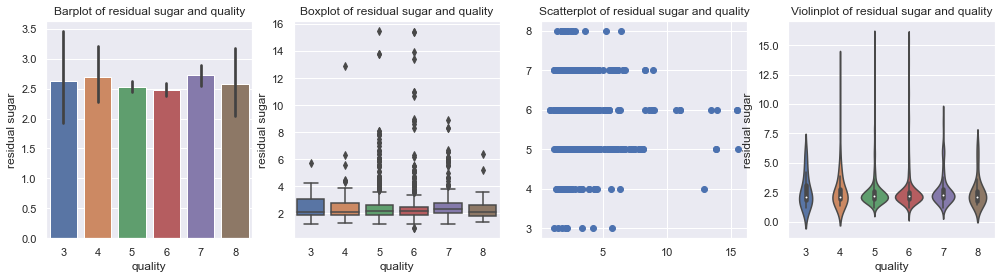

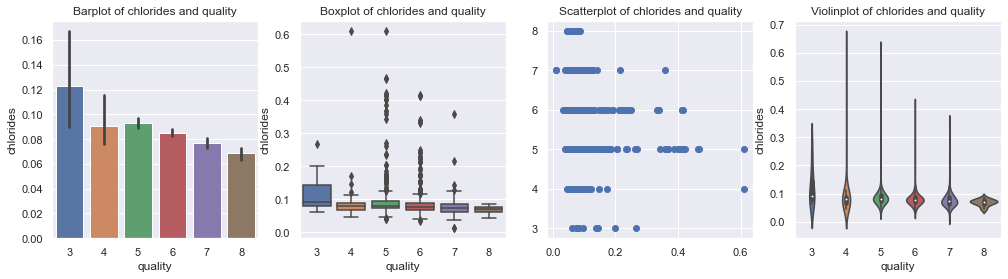

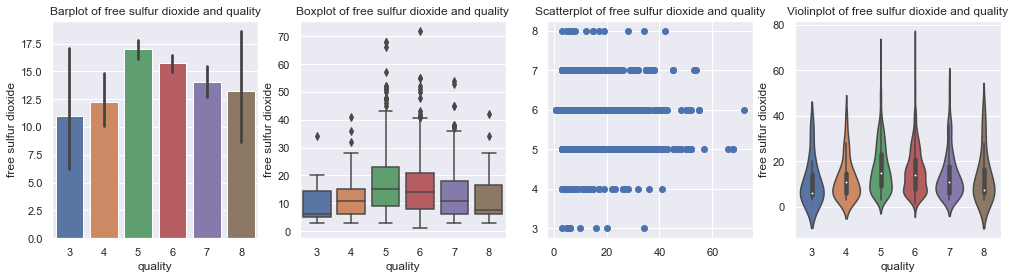

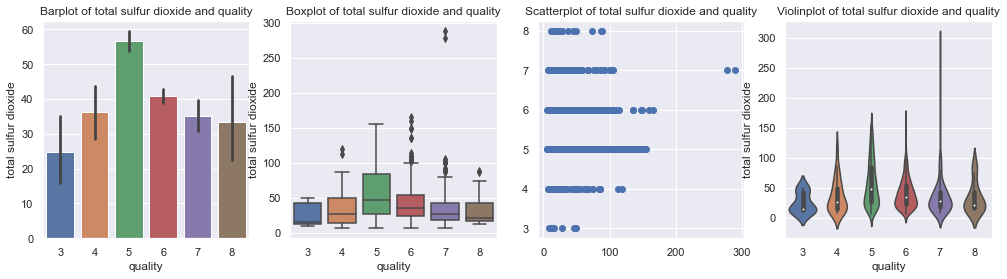

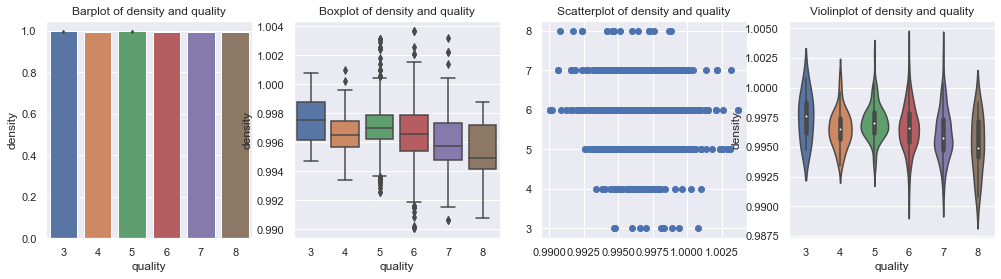

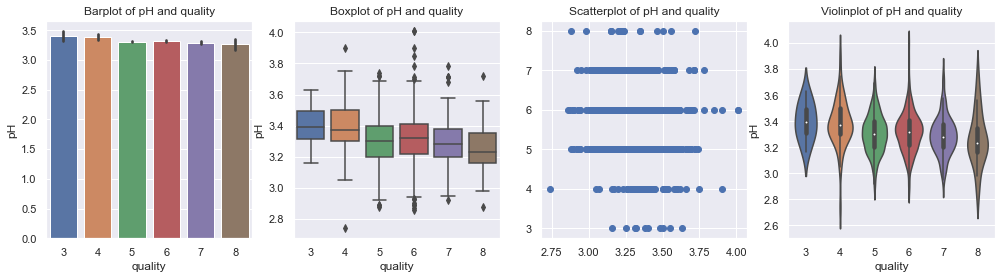

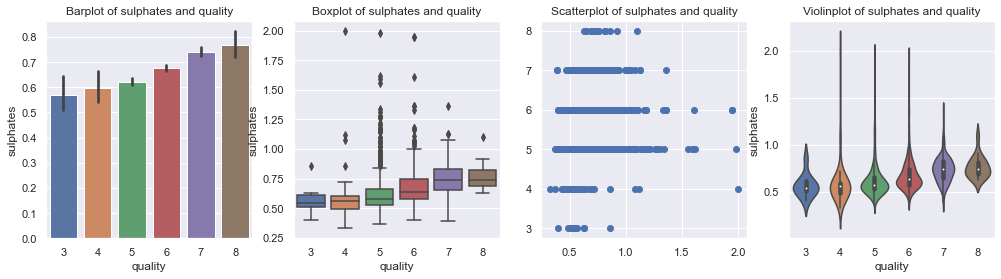

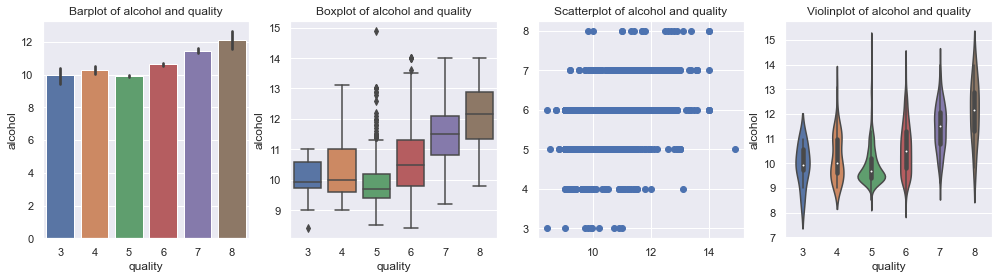

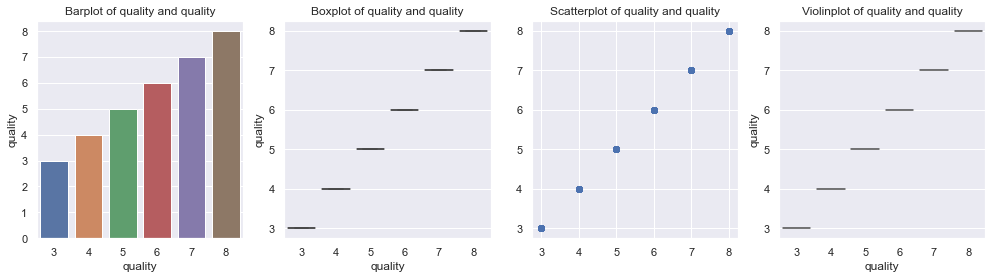

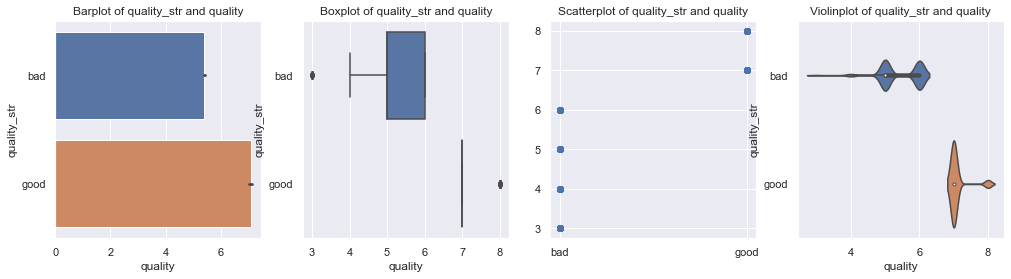

In [54]:
for variable in df:
    bivariate_plots(df,variable, 'quality')

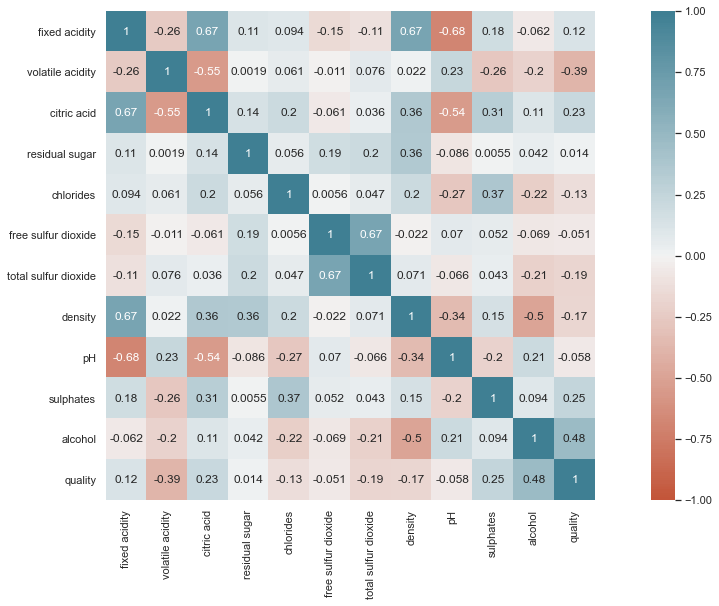

In [10]:
corr = df.corr()
plt.figure(figsize=(20, 9))
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True, annot=True
)

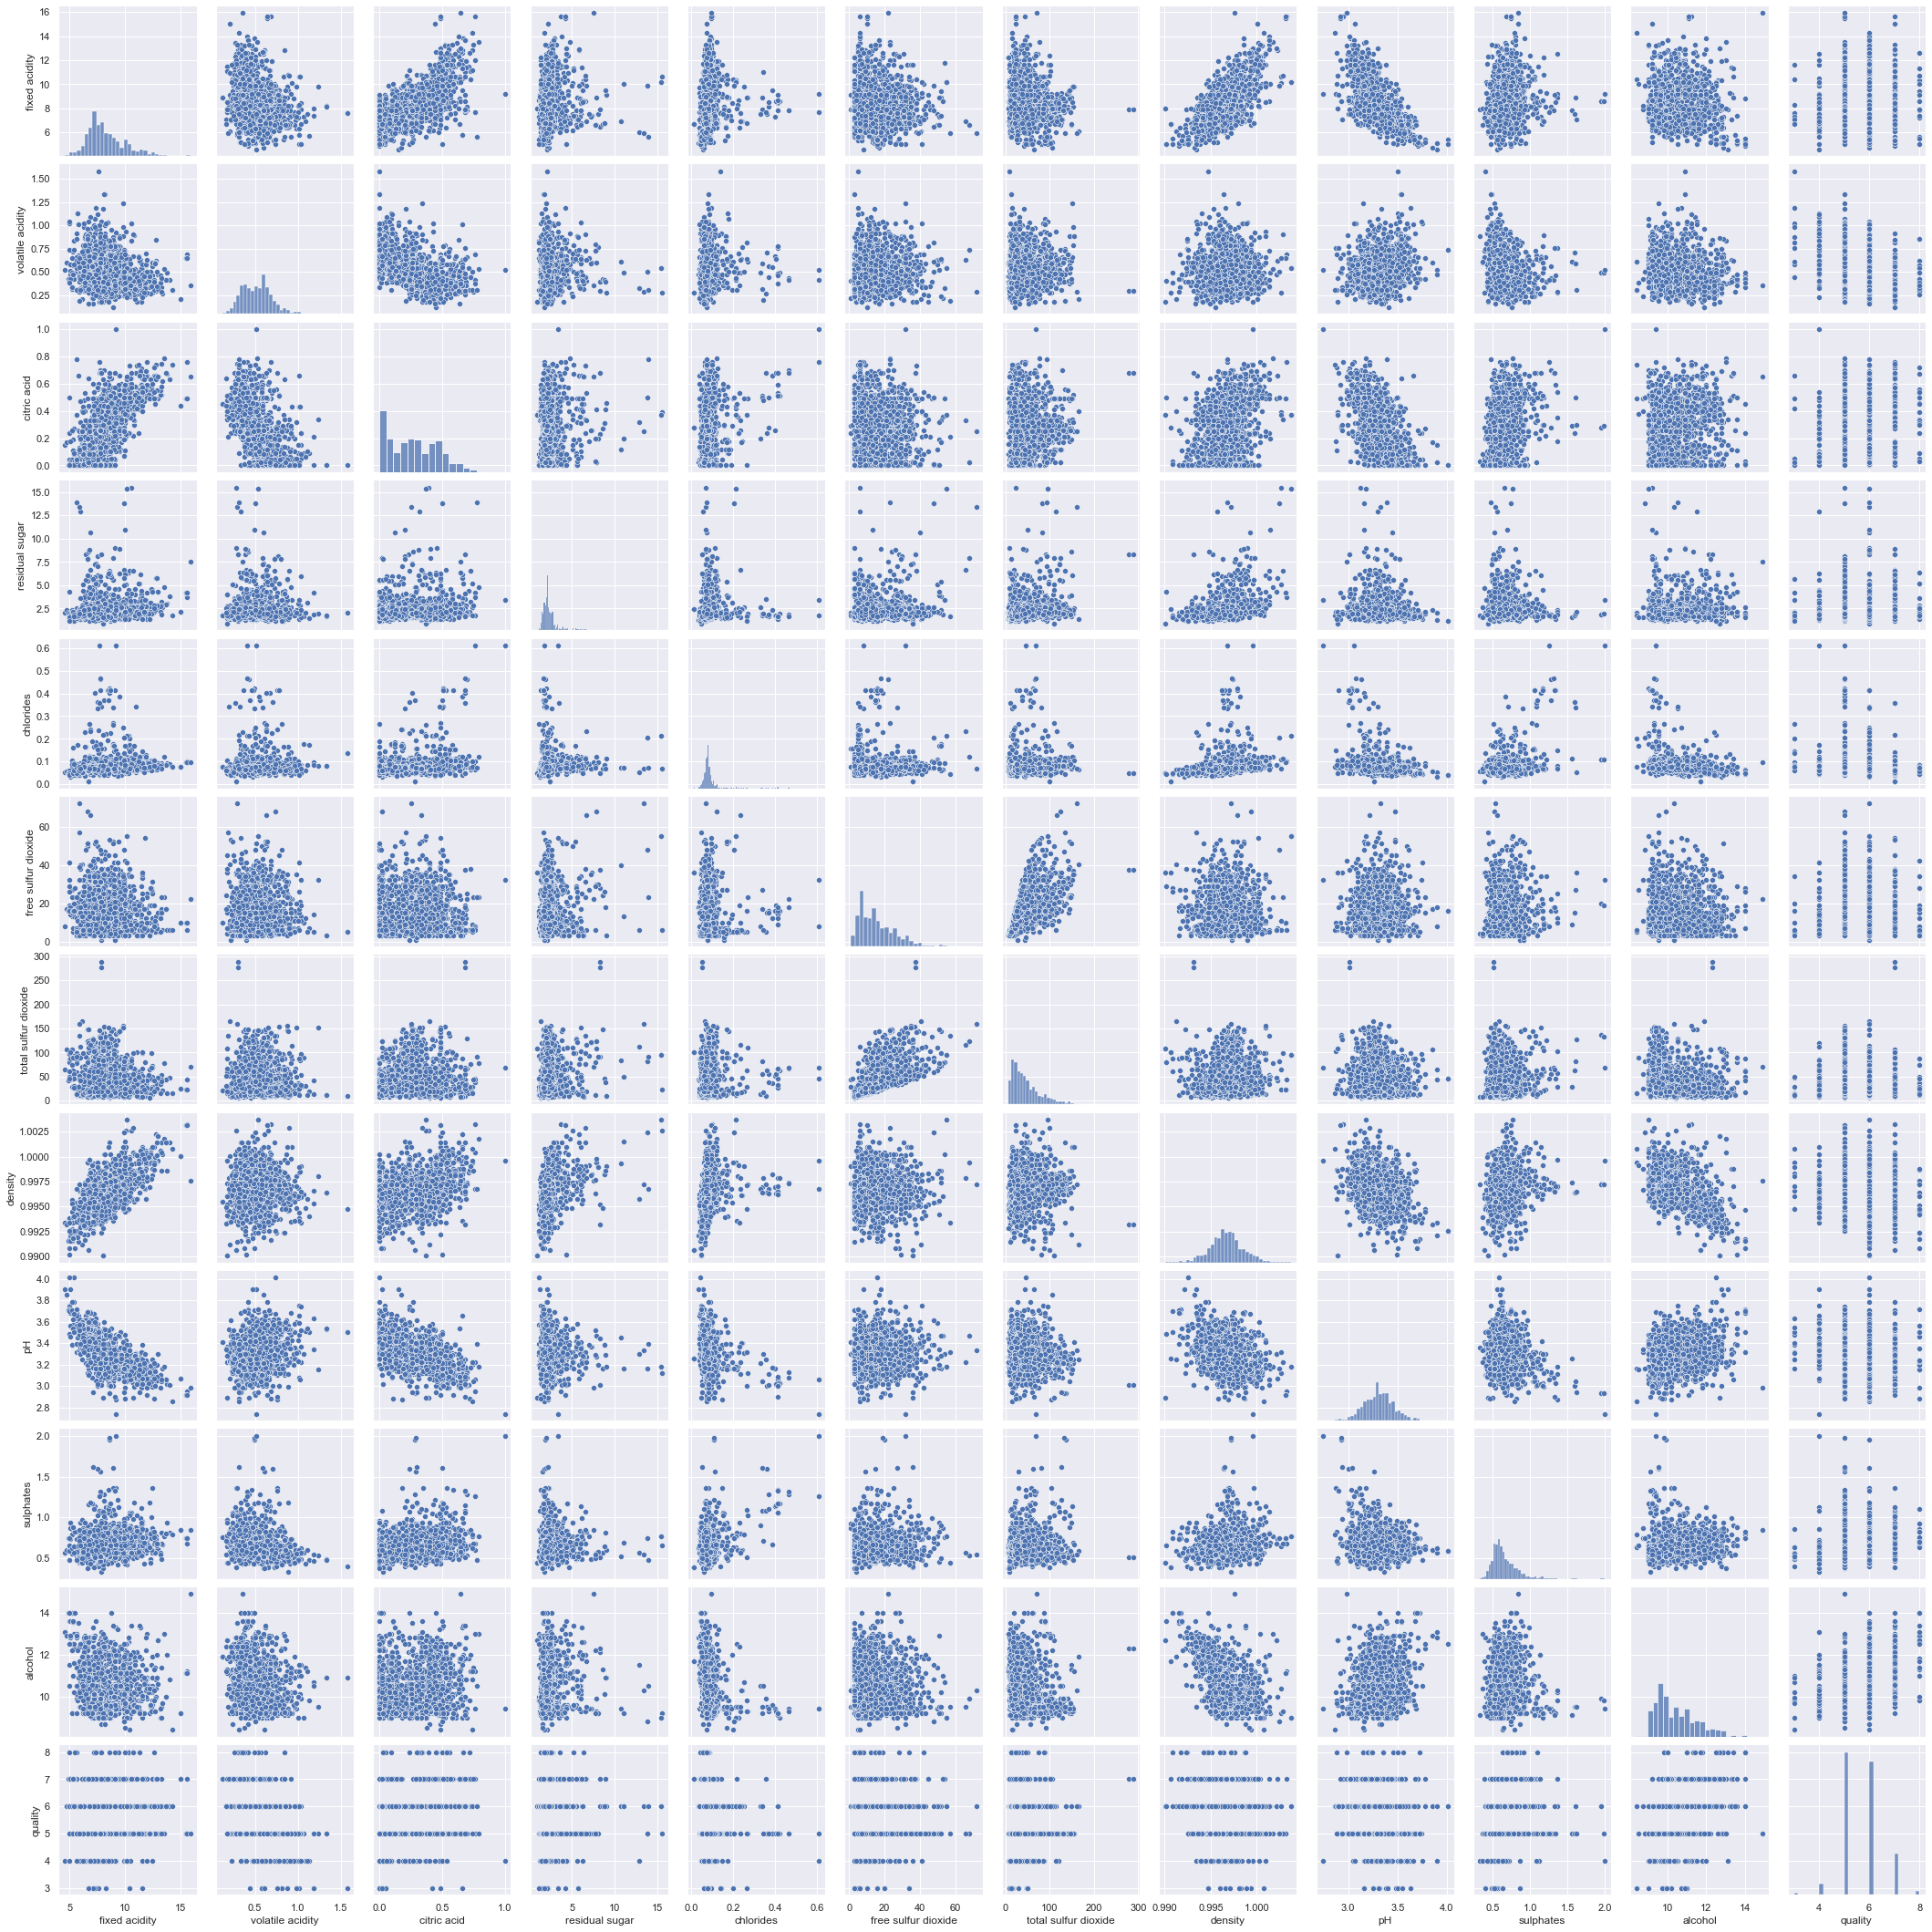

In [11]:
sb.pairplot(df)

In [12]:
df["quality_str"] = ['bad' if i<6.5 else 'good' for i in df["quality"]]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_str
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [13]:
df["quality_str"].value_counts()

bad     1382
good     217
Name: quality_str, dtype: int64

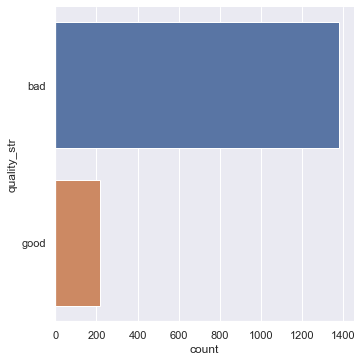

In [14]:
sb.catplot(y = "quality_str", data = df, kind = "count")

In [15]:
y = df["quality_str"]
X = df.drop(["quality_str", "quality"], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1199,) (1199, 11)
Test Set  : (400,) (400, 11)


In [18]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.316847,0.531560,0.268182,2.528565,0.087249,15.690158,45.772310,0.996743,3.314746,0.658090,10.442494
std,1.791149,0.179228,0.198520,1.329996,0.046479,10.338537,32.406438,0.001914,0.157410,0.168955,1.073567
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.400000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995565,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996800,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.090000,21.000000,61.000000,0.997870,3.410000,0.730000,11.100000
max,15.900000,1.580000,1.000000,13.900000,0.610000,72.000000,278.000000,1.003150,4.010000,2.000000,14.900000


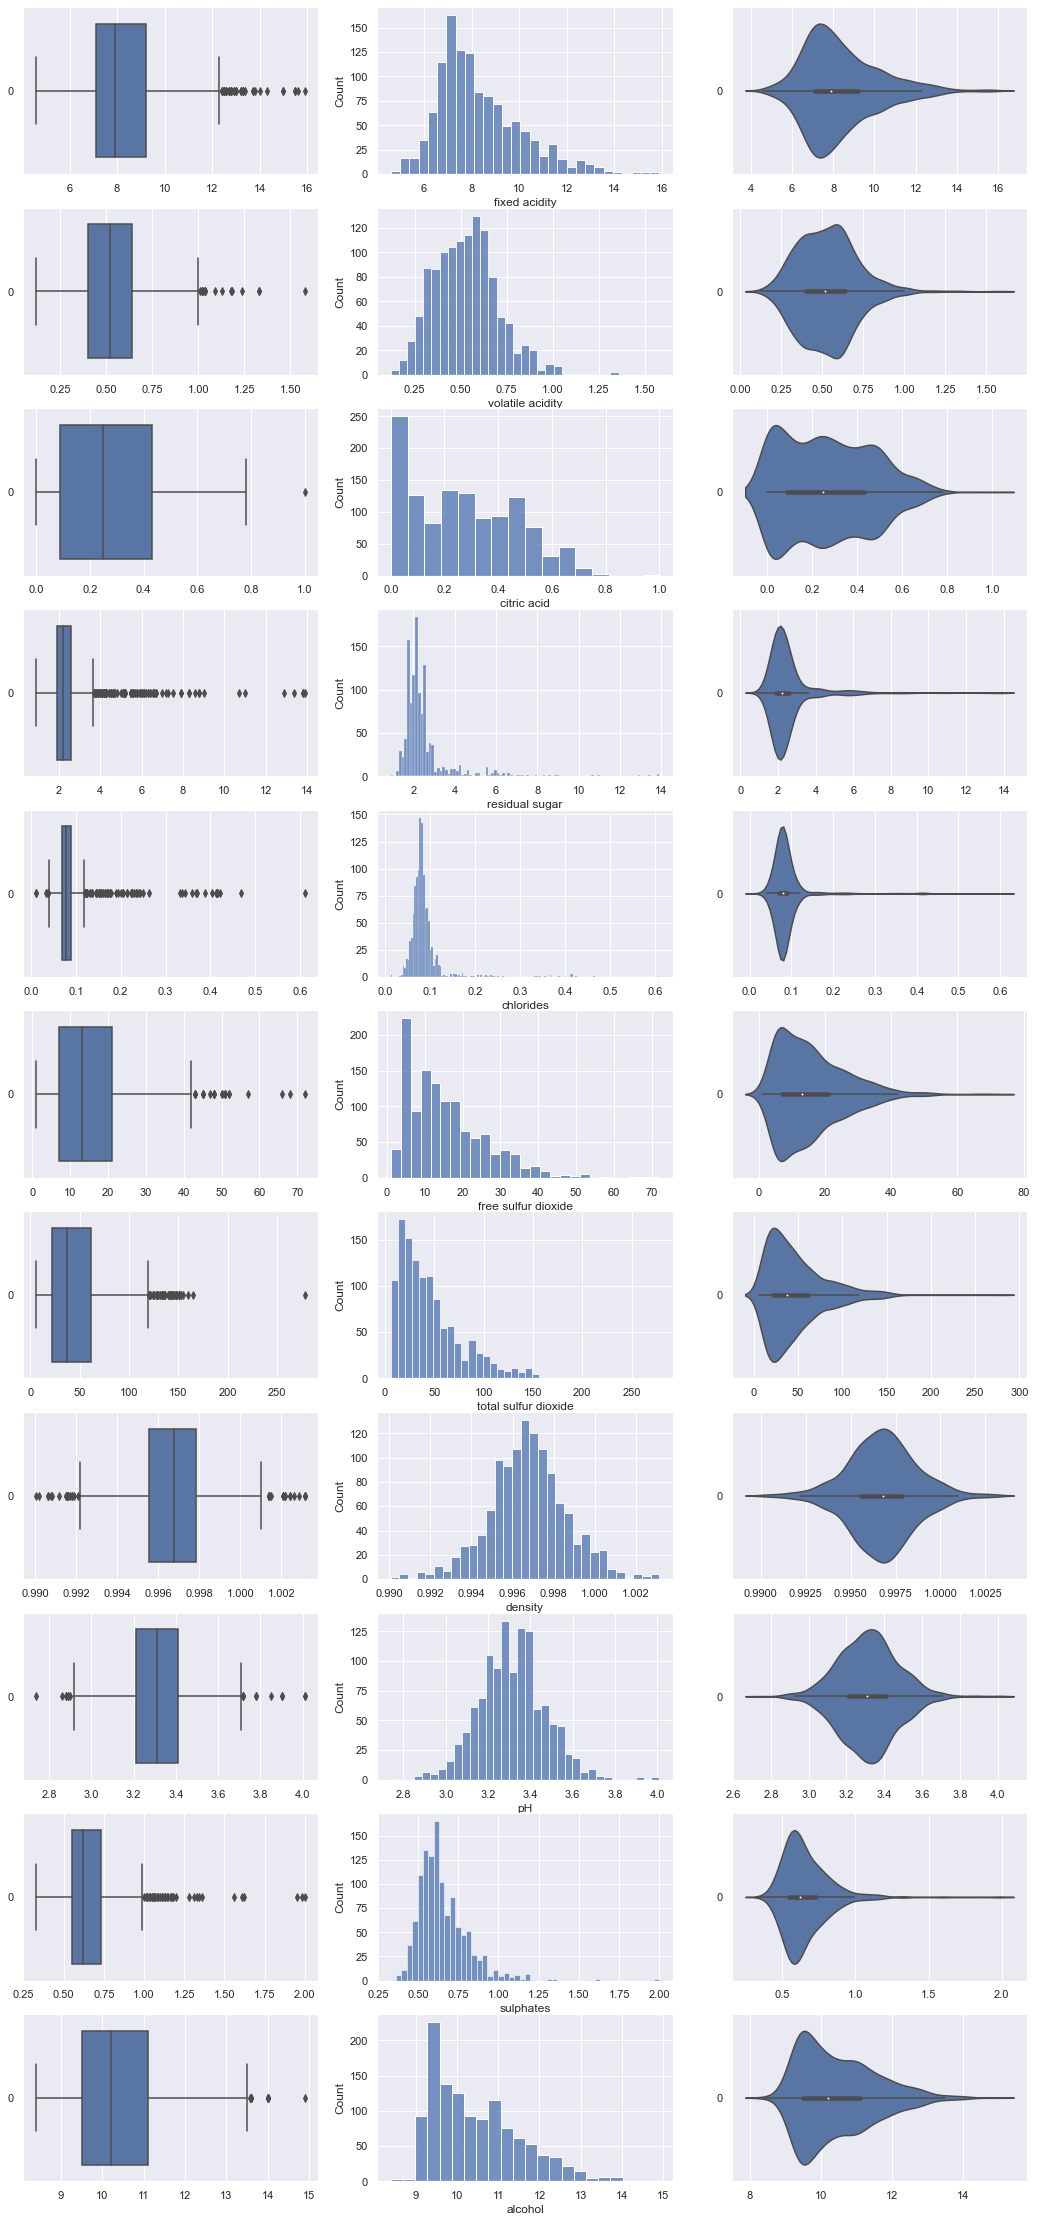

In [19]:
f, axes = plt.subplots(11, 3, figsize=(18, 40))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

## DECISION TREE

In [20]:
dt = DecisionTreeClassifier(random_state=0)

In [21]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
dt_y_test_pred = dt.predict(X_test)
dt_y_train_pred = dt.predict(X_train)

#### ACTUAL VS PREDICTED

In [23]:
results_series = {"actual":y_test, "predicted":dt_y_test_pred}
results = pd.DataFrame(results_series)
results.head()

,actual,predicted
75,bad,bad
1283,bad,bad
408,bad,bad
1281,bad,bad
1118,bad,bad


#### CONFUSION MATRIX FOR DECISION TREE

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.855



<AxesSubplot:>

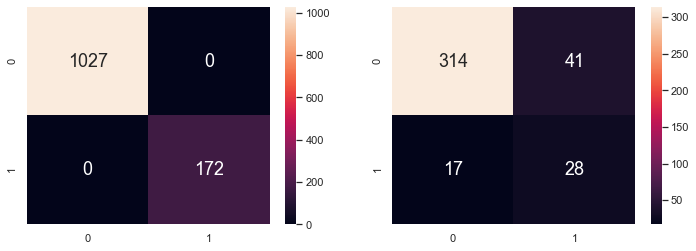

In [24]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dt.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dt.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, dt_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, dt_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### CLASSIFICATION REPORT FOR TRAIN AND TEST SETS

In [25]:
print(classification_report(y_train, dt_y_train_pred))
print(classification_report(y_test, dt_y_test_pred))

              precision    recall  f1-score   support

         bad       1.00      1.00      1.00      1027
        good       1.00      1.00      1.00       172

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

              precision    recall  f1-score   support

         bad       0.95      0.88      0.92       355
        good       0.41      0.62      0.49        45

    accuracy                           0.85       400
   macro avg       0.68      0.75      0.70       400
weighted avg       0.89      0.85      0.87       400



#### HANDLING OVERFITTING

In [26]:
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


In [27]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    train_ypred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_ypred)
    train_scores.append(train_acc)
    test_ypred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_ypred)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.857, test: 0.887
>2, train: 0.879, test: 0.885
>3, train: 0.883, test: 0.895
>4, train: 0.913, test: 0.882
>5, train: 0.928, test: 0.880
>6, train: 0.948, test: 0.875
>7, train: 0.957, test: 0.880
>8, train: 0.969, test: 0.892
>9, train: 0.974, test: 0.892
>10, train: 0.982, test: 0.880
>11, train: 0.986, test: 0.880
>12, train: 0.988, test: 0.873
>13, train: 0.992, test: 0.875
>14, train: 0.994, test: 0.860
>15, train: 0.997, test: 0.860
>16, train: 0.998, test: 0.858
>17, train: 0.999, test: 0.870
>18, train: 1.000, test: 0.865
>19, train: 1.000, test: 0.863
>20, train: 1.000, test: 0.860


In [28]:
dt_new = DecisionTreeClassifier(max_depth=3, random_state=1)
dt_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [29]:
dt_new_y_test_pred = dt_new.predict(X_test)
dt_new_y_train_pred = dt_new.predict(X_train)

#### UPDATED CONFUSION MATRIX

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8832360300250208

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.895



<AxesSubplot:>

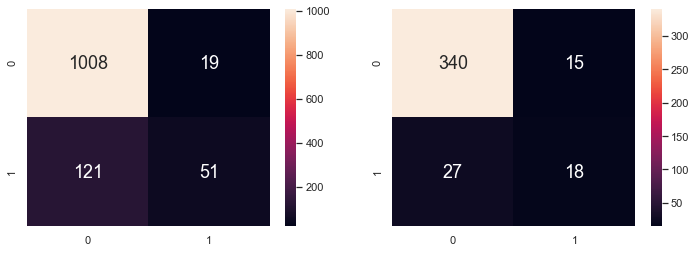

In [30]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dt_new.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dt_new.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, dt_new_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, dt_new_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### CLASSIFICATION REPORT FOR TRAIN AND TEST SETS

In [31]:
print(classification_report(y_train, dt_new_y_train_pred))
print(classification_report(y_test, dt_new_y_test_pred))

              precision    recall  f1-score   support

         bad       0.89      0.98      0.94      1027
        good       0.73      0.30      0.42       172

    accuracy                           0.88      1199
   macro avg       0.81      0.64      0.68      1199
weighted avg       0.87      0.88      0.86      1199

              precision    recall  f1-score   support

         bad       0.93      0.96      0.94       355
        good       0.55      0.40      0.46        45

    accuracy                           0.90       400
   macro avg       0.74      0.68      0.70       400
weighted avg       0.88      0.90      0.89       400



#### CROSS VALIDATION

In [32]:
acc_rf = accuracy_score(y_test, dt_new_y_test_pred)
print('Accuracy = ', acc_rf)
scores = cross_val_score(dt_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Accuracy =  0.895
Cross Validation Score:  0.8692750783699061


## RANDOM FOREST

In [33]:
rf = RandomForestClassifier(random_state=3)

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=3)

In [35]:
rf_y_test_pred = rf.predict(X_test)
rf_y_train_pred = rf.predict(X_train)

#### ACTUAL VS PREDICTED

In [36]:
results_series = {"actual":y_test, "predicted":rf_y_test_pred}
results = pd.DataFrame(results_series)
results.head()

,actual,predicted
75,bad,bad
1283,bad,bad
408,bad,bad
1281,bad,bad
1118,bad,bad


#### CONFUSION MATRIX FOR RANDOM FOREST

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9275



<AxesSubplot:>

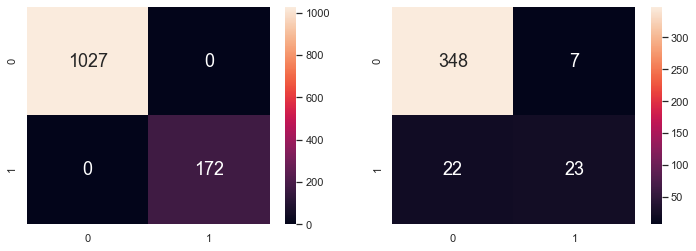

In [37]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### CLASSIFICATION REPORT FOR TRAIN AND TEST SETS

In [38]:
print(classification_report(y_train, rf_y_train_pred))
print(classification_report(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

         bad       1.00      1.00      1.00      1027
        good       1.00      1.00      1.00       172

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

              precision    recall  f1-score   support

         bad       0.94      0.98      0.96       355
        good       0.77      0.51      0.61        45

    accuracy                           0.93       400
   macro avg       0.85      0.75      0.79       400
weighted avg       0.92      0.93      0.92       400



#### HANDLING OVERFITTING

In [39]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 3, 'verbose': 0, 'warm_start': False}


In [49]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
for i in values:
    model2 = RandomForestClassifier(max_depth=i)
    model2.fit(X_train, y_train)
    train_ypred = model2.predict(X_train)
    train_acc = accuracy_score(y_train, train_ypred)
    train_scores.append(train_acc)
    test_ypred = model2.predict(X_test)
    test_acc = accuracy_score(y_test, test_ypred)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.857, test: 0.887
>2, train: 0.867, test: 0.895
>3, train: 0.880, test: 0.907
>4, train: 0.906, test: 0.917
>5, train: 0.932, test: 0.905
>6, train: 0.949, test: 0.902
>7, train: 0.970, test: 0.912
>8, train: 0.979, test: 0.925
>9, train: 0.988, test: 0.912
>10, train: 0.994, test: 0.925
>11, train: 0.998, test: 0.915
>12, train: 1.000, test: 0.917
>13, train: 1.000, test: 0.912
>14, train: 1.000, test: 0.910
>15, train: 1.000, test: 0.915
>16, train: 1.000, test: 0.917
>17, train: 1.000, test: 0.912
>18, train: 1.000, test: 0.917
>19, train: 1.000, test: 0.915
>20, train: 1.000, test: 0.910


In [41]:
rf_new = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=4)
rf_new.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=4)

In [42]:
rf_new_y_test_pred = rf_new.predict(X_test)
rf_new_y_train_pred = rf_new.predict(X_train)

#### UPDATED CONFUSION MATRIX

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9065888240200167

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.92



<AxesSubplot:>

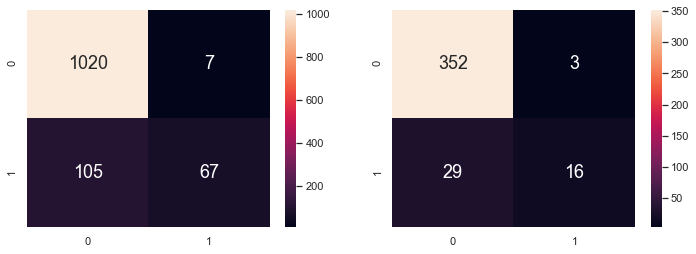

In [43]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf_new.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf_new.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_new_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_new_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### CLASSIFICATION REPORT FOR TRAIN AND TEST SETS

In [44]:
print(classification_report(y_train, rf_new_y_train_pred))
print(classification_report(y_test, rf_new_y_test_pred))

              precision    recall  f1-score   support

         bad       0.91      0.99      0.95      1027
        good       0.91      0.39      0.54       172

    accuracy                           0.91      1199
   macro avg       0.91      0.69      0.75      1199
weighted avg       0.91      0.91      0.89      1199

              precision    recall  f1-score   support

         bad       0.92      0.99      0.96       355
        good       0.84      0.36      0.50        45

    accuracy                           0.92       400
   macro avg       0.88      0.67      0.73       400
weighted avg       0.91      0.92      0.91       400



#### CROSS VALIDATION

In [45]:
acc_rf = accuracy_score(y_test, rf_new_y_test_pred)
print('Accuracy = ', acc_rf)
scores = cross_val_score(rf_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Accuracy =  0.92
Cross Validation Score:  0.8755466300940439


#### FEATURE IMPORTANCE FOR RANDOM FOREST

In [46]:
imp_rf = pd.DataFrame(zip(X_train.columns, rf_new.feature_importances_),columns = ["feature", "importance"])
imp_rf.set_index("feature", inplace=True)
imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
imp_rf.head()

,importance
feature,
alcohol,0.259704
volatile acidity,0.182031
sulphates,0.129916
density,0.095975
citric acid,0.073530


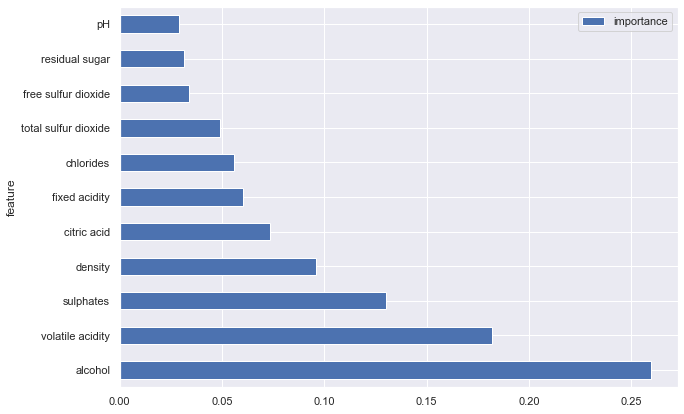

In [47]:
imp_rf.plot.barh(figsize=(10,7))
plt.show()